$C_L[n]=\frac{2F_L[n]}{\rho V[n]^2S}$

c_lift = (2*f_lift)/(p*(V[n]**2)*S)

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

# List CSV files in the current folder
csv_files = sorted([f for f in os.listdir('.') if f.endswith('.csv')])



In [ ]:
# 3D Visualization of CSV Data (excluding timestamps)
import plotly.graph_objs as go

# Select a CSV file to visualize
for csv_file in csv_files:
    df = pd.read_csv(csv_file)

    # Assume columns: ['timestamp', 'x', 'y', 'z', ...] and drop timestamp
    columns = [col for col in df.columns if col.lower() not in ['timestamp', 'time']]
    if len(columns) >= 3:
        x, y, z = columns[:3]
        # Main scatter points
        scatter = go.Scatter3d(
            x=df[x],
            y=df[y],
            z=-df[z],  # Flip the z-axis
            mode='markers',
            marker=dict(size=3),
            name='Path'
        )
        # Start point
        start = go.Scatter3d(
            x=[df[x].iloc[0]],
            y=[df[y].iloc[0]],
            z=[-df[z].iloc[0]],
            mode='markers',
            marker=dict(size=8, color='green', symbol='circle'),
            name='Start'
        )
        # End point
        end = go.Scatter3d(
            x=[df[x].iloc[-1]],
            y=[df[y].iloc[-1]],
            z=[-df[z].iloc[-1]],
            mode='markers',
            marker=dict(size=8, color='red', symbol='diamond'),
            name='End'
        )
        camera = dict(eye=dict(x=-1.5, y=1.5, z=1.0))  # View from -x, +y corner
        fig = go.Figure(data=[scatter, start, end])
        fig.update_layout(
            title=f'3D Map of {csv_file}',
            scene=dict(xaxis_title=x, yaxis_title=y, zaxis_title=z),
            scene_camera=camera
        )
        fig.show()
    else:
        print('Not enough columns for 3D visualization.')

In [100]:
def plot_velocity_x(df, position_cols=['position_x', 'x'], time_col='timestamp', threshold=0.08):
    """Plot velocity in X direction over time from a DataFrame, ignoring points where velocity is close to zero."""
    for position_col in position_cols:
        if position_col in df.columns and time_col in df.columns:
            # Correct velocity calculation: divide by time difference in seconds
            velocity_x = (df[position_col].shift(1) - df[position_col]) / ((df[time_col].shift(1) - df[time_col]) ) 
            time_s = df[time_col][1:] 
            velocity_x = velocity_x[1:] 
            # Filter out points where velocity is close to zero
            mask = velocity_x.abs() > threshold
            plt.figure(figsize=(10, 4))
            plt.plot(time_s[mask], velocity_x[mask])
            plt.xlabel('Time (s)')
            plt.ylabel('Velocity X (m/s)')
            plt.title('Velocity in X direction over time (filtered)')
            plt.grid(True)
            plt.show()
            return
    print(f'Required columns {position_cols} and "{time_col}" not found in the DataFrame.')

# Example usage:


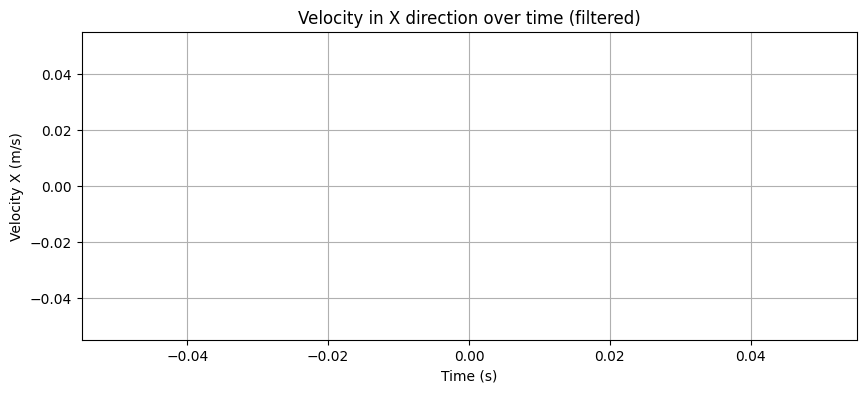

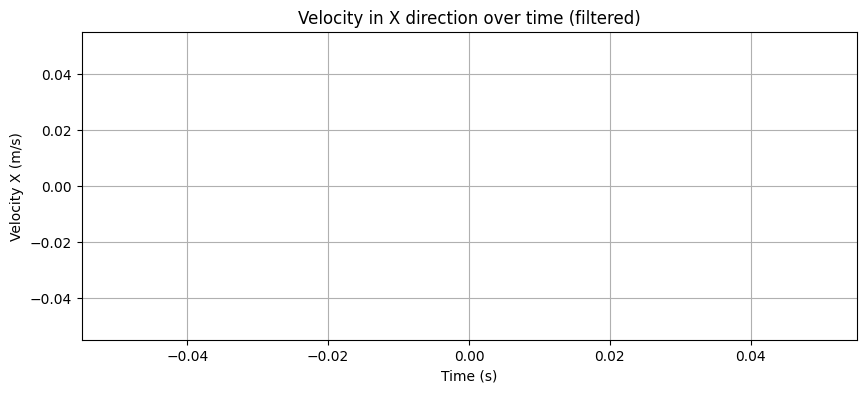

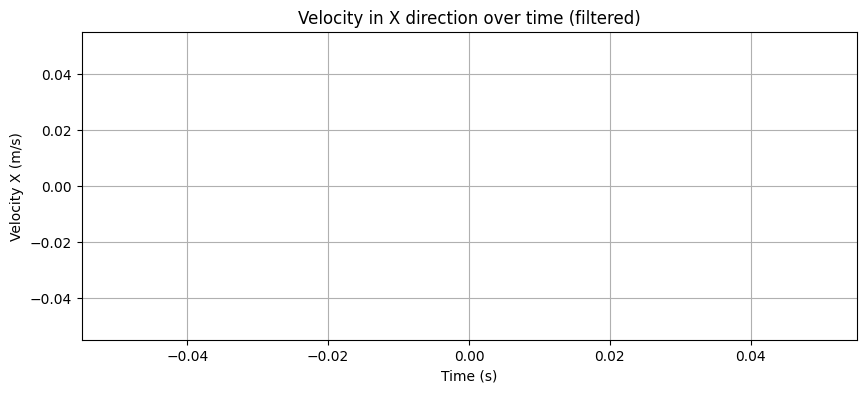

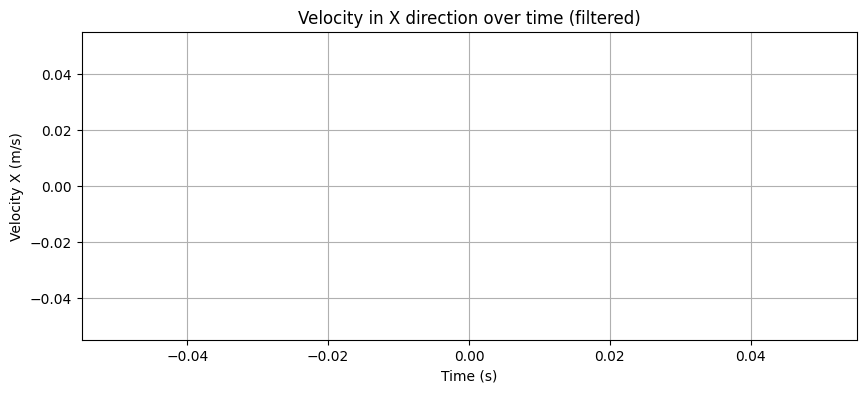

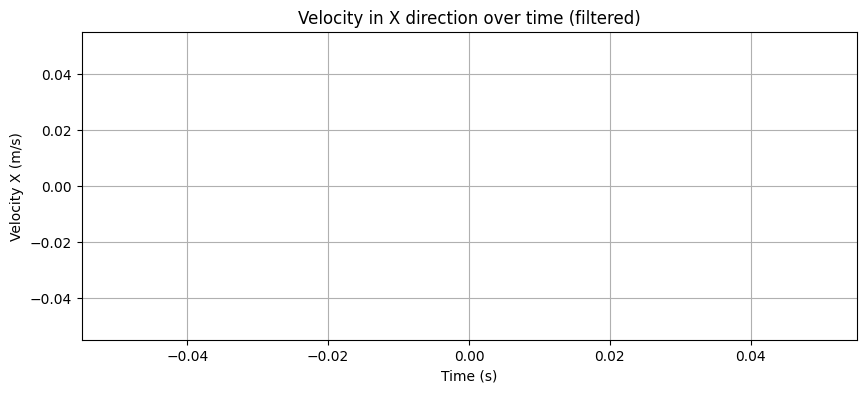

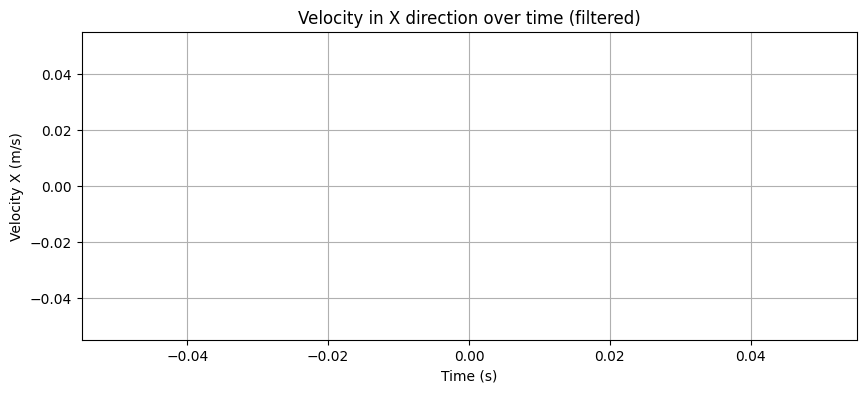

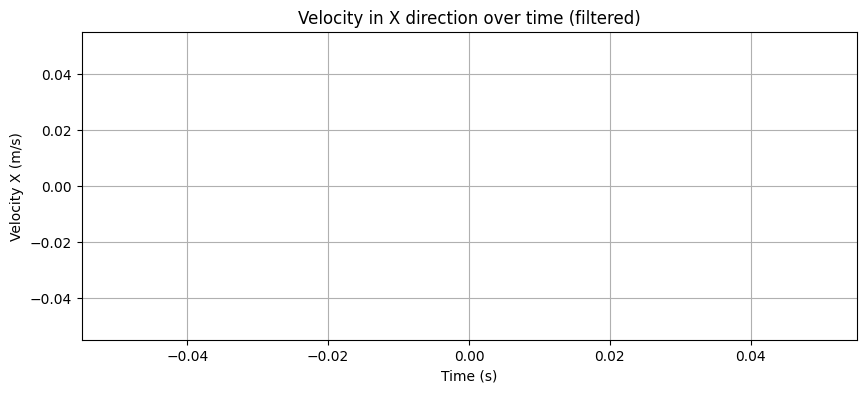

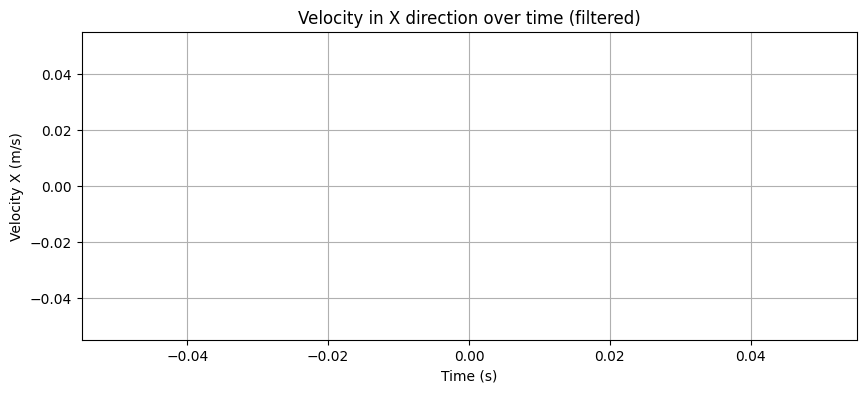

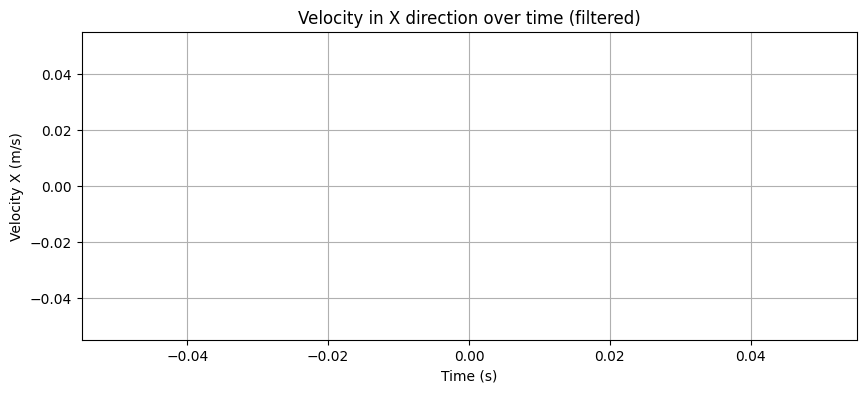

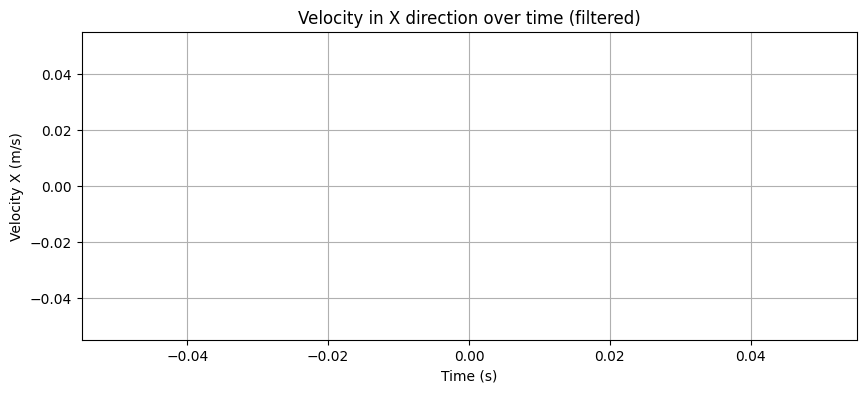

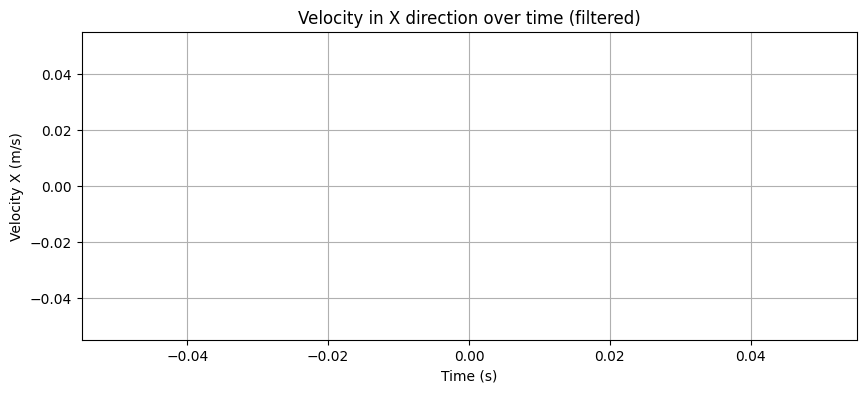

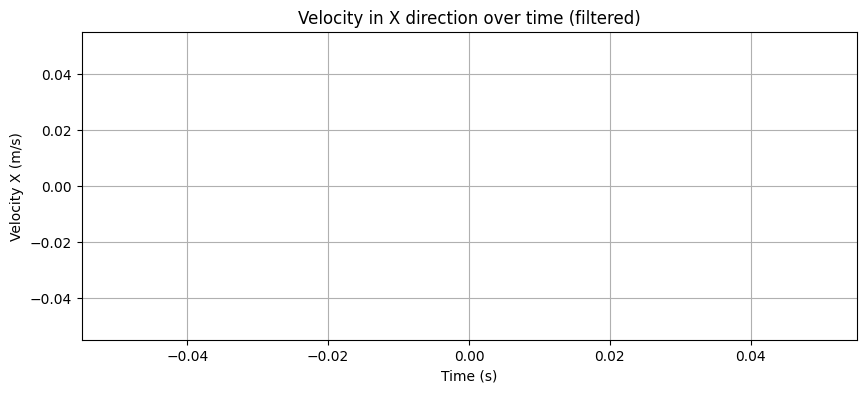

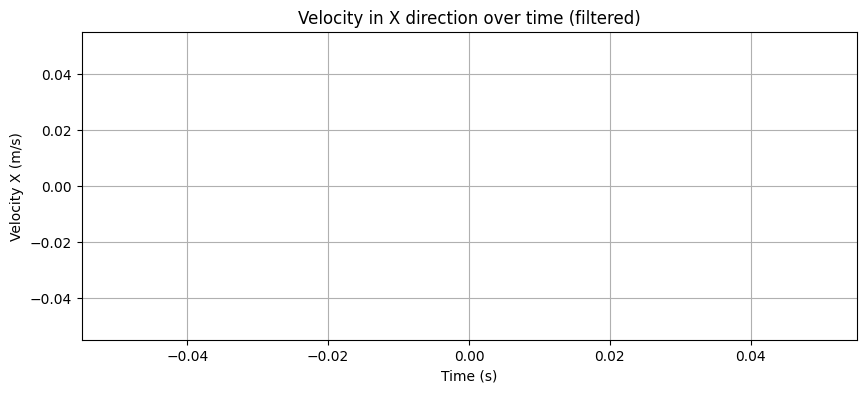

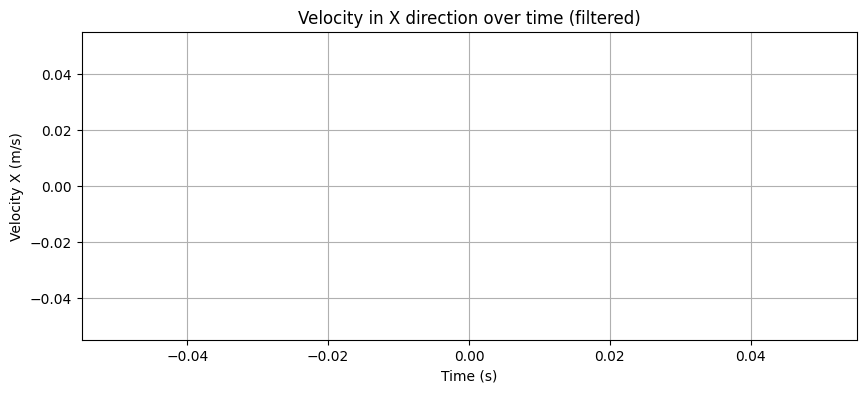

In [102]:
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    plot_velocity_x(df)